# LAB2: Hough’s transformations
### Please write a Python code which realize following functionality:
### In the given images (tray1.jpg. . . tray8.jpg) find coins 5 zlotys or 5 groszy.
1. Using the Hough transform, find as many coins as possible on drawings
2. Find the edges of the tray.
3. Specify the tray area.
4. Count the coins in and out of the tray.
5. Specify the total in and out of the tray.

### The task should be sent by Teams system according to the dates specified in the assignment.

#### Good luck

Mateusz Andrzejewski

---

### Created by: `Jakub Góralczyk`

---

In [13]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [14]:
plt.rcParams['figure.figsize'] = [10,7]
plt.rcParams['figure.dpi'] = 100 

In [15]:
def line_values(image, lines):
   x0, y0, _ , _ = lines[0][0]
   lower_x = higher_x = x0
   lower_y = higher_y = y0

   for line in lines:
      x1, y1, x2, y2 = line[0]    
      cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
      #collect coordinates of edges of tray that mark the border of tray 
      lower_x = x1 if x1 < lower_x else lower_x
      lower_x = x1 if x2 < lower_x else lower_x

      lower_y = y1 if y1 < lower_y else lower_y
      lower_y = y1 if y2 < lower_y else lower_y

      higher_x = x1 if x1 > higher_x else higher_x
      higher_x = x1 if x2 > higher_x else higher_x
      
      higher_y = y1 if y1 > higher_y else higher_y
      higher_y = y1 if y2 > higher_y else higher_y

   return lower_x, lower_y, higher_x, higher_y

In [16]:
def transformations(image_path):

   image = cv2.imread(image_path)
   image =cv2.medianBlur(image,5)

   gray_image = cv2.GaussianBlur(image, (21,21), cv2.BORDER_DEFAULT)
   gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

   circles = cv2.HoughCircles(gray_image,cv2.HOUGH_GRADIENT,1,10, param1=110,param2=49,minRadius=0,maxRadius=0)
   circles = np.uint16(np.around(circles))
   
   edges = cv2.Canny(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY), 1, 100,apertureSize=3)
   lines = cv2.HoughLinesP(edges, 1, np.pi / 180,threshold=100 ,minLineLength=100, maxLineGap=30)
    
   lower_x, lower_y, higher_x, higher_y = line_values(image, lines)

   coins_inside_tray = coins_outside_tray  = 0
   value_inside = value_outside = 0.0

   radius_split=34 #radius threshold 
   #because the 5 zloty coins have a smaller radius in these images
   if(image_path in ['tray3.jpg','tray4.jpg','tray6.jpg']): radius_split = 32

   # for each circle detected 
   for i in circles[0,:]: 
       cv2.circle(gray_image,(i[0],i[1]),i[2],(0,255,0),2)
       cv2.circle(gray_image,(i[0],i[1]),2,(0,0,255),3)
       #  check if it is within the specified area 
       if(i[0]>lower_x and i[0]< higher_x and i[1]>lower_y and i[1]<higher_y):

           coins_inside_tray+=1
           value_inside+= 0.05 if i[2]<radius_split else 5 #if the radius is smaller than radius_split then it is a 0.05 zloty coin else it is a 5 zloty coin
       else:
           coins_outside_tray+=1
           value_outside+= 0.05 if i[2]<radius_split else 5

   cv2.putText(gray_image, f'Coins inside  the tray = {str(coins_inside_tray)}', (0,30), cv2.FONT_HERSHEY_COMPLEX, 0.7, (255,255,255))
   cv2.putText(gray_image, f'Coins outside the tray = {str(coins_outside_tray)}', (0,60), cv2.FONT_HERSHEY_COMPLEX, 0.7, (255,255,255))
   cv2.putText(gray_image, f'Value inside  the tray = {str(round(value_inside,2))}', (0,90), cv2.FONT_HERSHEY_COMPLEX, 0.7, (255,255,255))
   cv2.putText(gray_image, f'Value outside the tray = {str(round(value_outside,2))}', (0,120), cv2.FONT_HERSHEY_COMPLEX, 0.7, (255,255,255))
   #cv2.imshow("Lines",image )

   display_image(image)
   display_image(gray_image)
   print(f'amount of coins in the tray: {coins_inside_tray}')
   print(f'amount of coins outside the tray: {coins_outside_tray}')
   print(f'{round(value_inside,2)} zloty in the tray')
   print(f'{round(value_outside,2)} zloty out the tray')
   cv2.destroyAllWindows()

In [17]:
def display_image(image):
    plt.axis('off')
    plt.imshow( cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

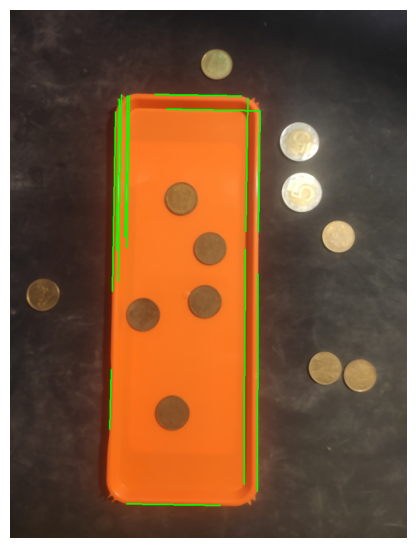

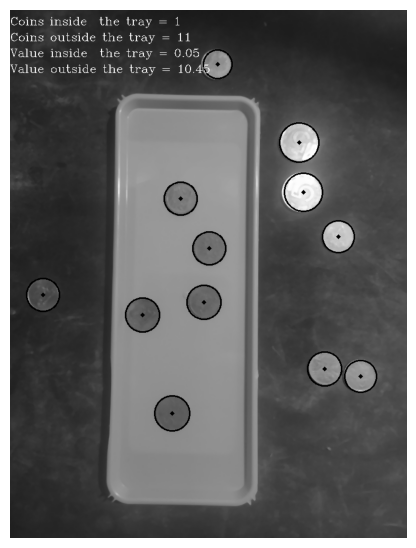

amount of coins in the tray: 1
amount of coins outside the tray: 11
0.05 zloty in the tray
10.45 zloty out the tray


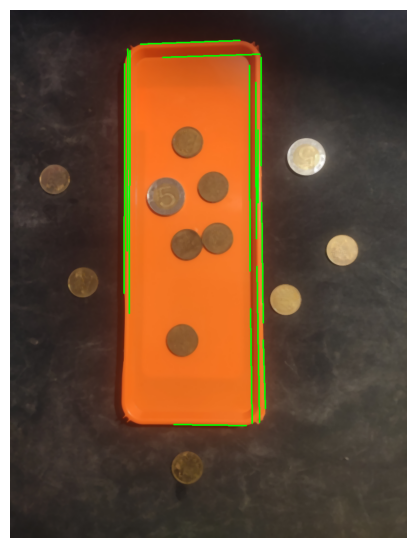

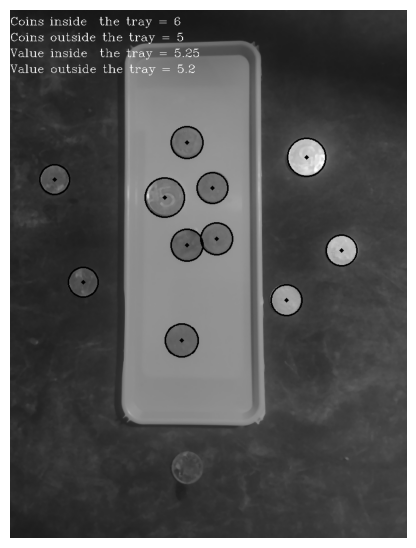

amount of coins in the tray: 6
amount of coins outside the tray: 5
5.25 zloty in the tray
5.2 zloty out the tray


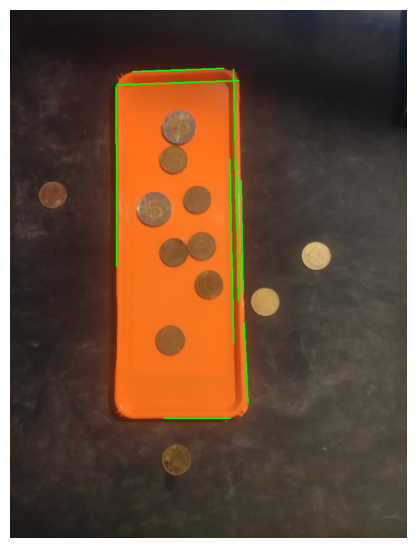

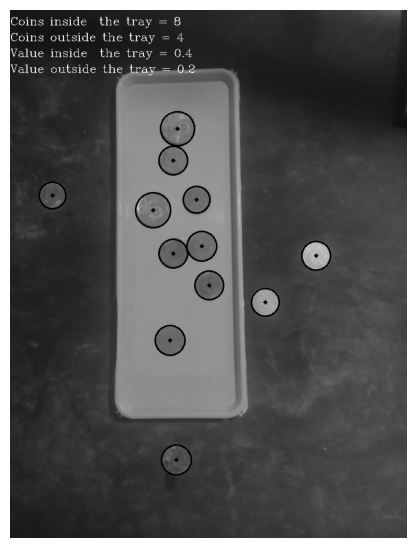

amount of coins in the tray: 8
amount of coins outside the tray: 4
0.4 zloty in the tray
0.2 zloty out the tray


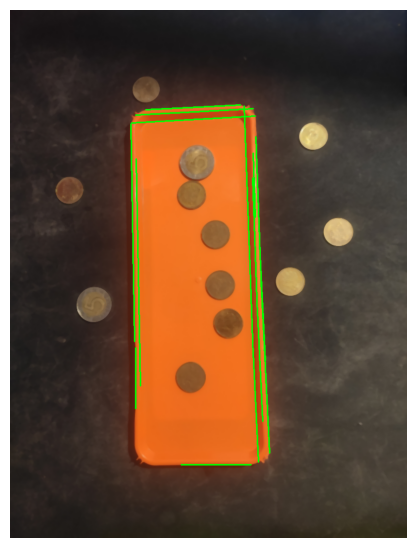

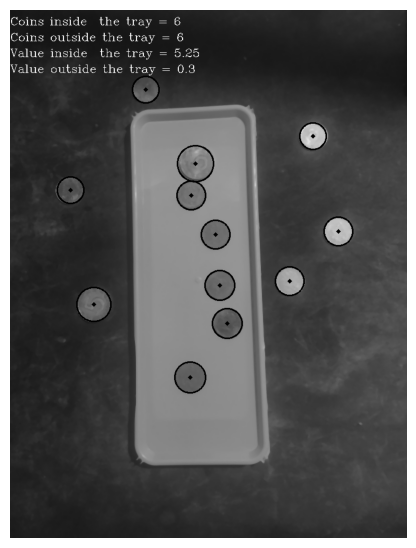

amount of coins in the tray: 6
amount of coins outside the tray: 6
5.25 zloty in the tray
0.3 zloty out the tray


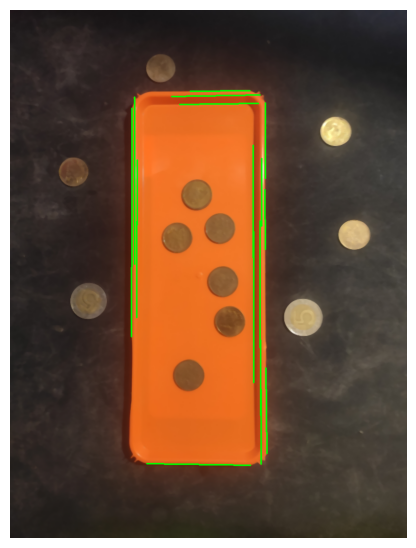

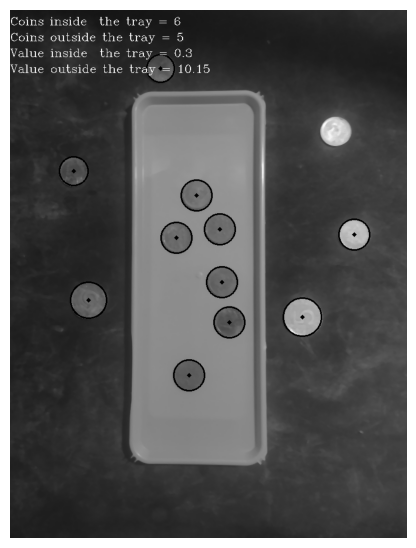

amount of coins in the tray: 6
amount of coins outside the tray: 5
0.3 zloty in the tray
10.15 zloty out the tray


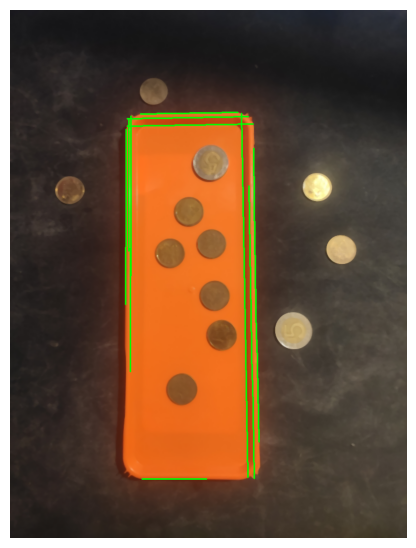

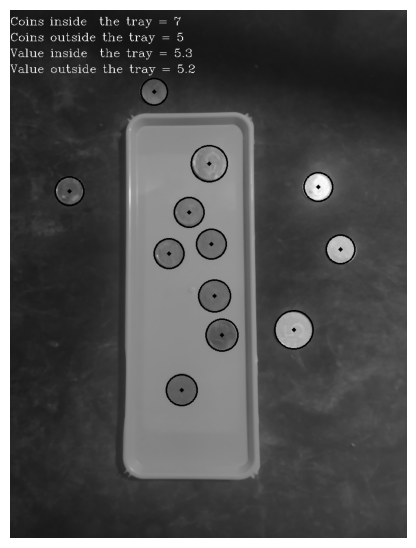

amount of coins in the tray: 7
amount of coins outside the tray: 5
5.3 zloty in the tray
5.2 zloty out the tray


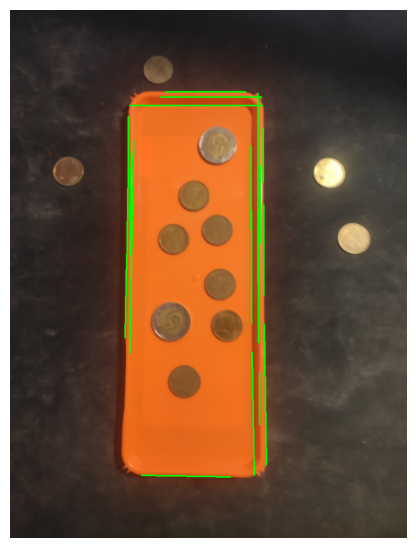

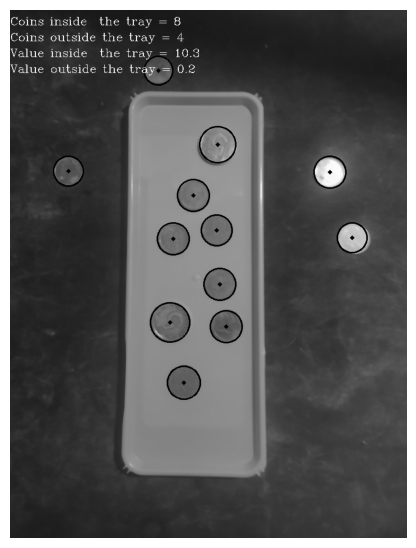

amount of coins in the tray: 8
amount of coins outside the tray: 4
10.3 zloty in the tray
0.2 zloty out the tray


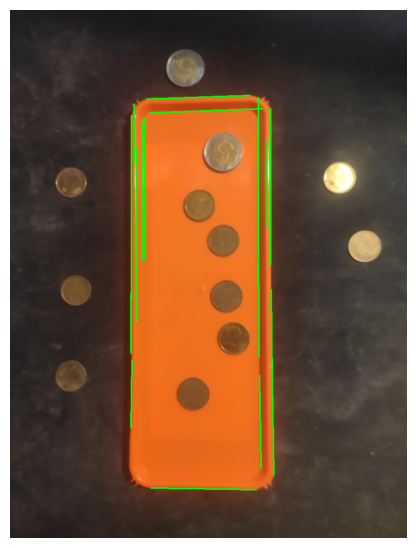

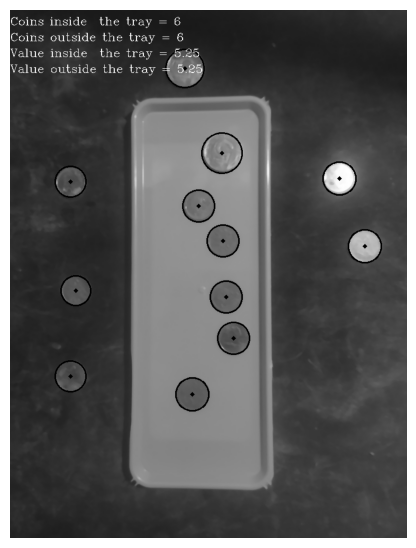

amount of coins in the tray: 6
amount of coins outside the tray: 6
5.25 zloty in the tray
5.25 zloty out the tray


In [18]:
transformations('images\\tray1.jpg')
transformations('images\\tray2.jpg')
transformations('images\\tray3.jpg')
transformations('images\\tray4.jpg')
transformations('images\\tray5.jpg')
transformations('images\\tray6.jpg')
transformations('images\\tray7.jpg')
transformations('images\\tray8.jpg')